# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [80]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [81]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

Number of instances: 2845, number of attributes: 1000
               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


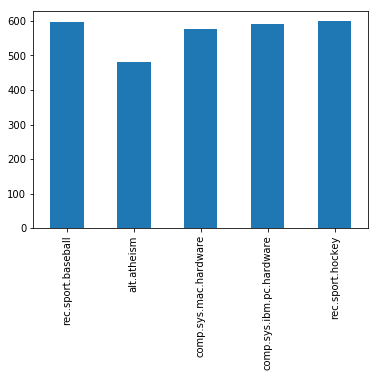

In [82]:
print('Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))
df = pd.DataFrame.from_dict(Counter(y), orient='index')
df.plot(kind='bar', legend=False) # almost equally distributed
print(X.describe()) # the data is sparse
X.head(5)

Each data point represents an article which belongs to one of the 5 classes and is represented by 1000 numerical features in a range 0 to 1, that vary depending on how each word is important for a given article. The data is high-dimensional and sparse with many 0s in the representation. The words are sorted alphabetically and there are 2845 data points.

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [83]:
kmeans = KMeans(n_clusters=5, random_state=1337).fit(X)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [84]:
mean_point = [np.mean(X, axis=0).values]
distances = distance.cdist(X, mean_point, 'euclidean')
print("Mean distance from the center point: {:.3f}".format(np.mean(distances)))
print("Inertia of the model: {:.3f}".format(kmeans.inertia_))
print("Adjusted rand score: {:.3f}".format(adjusted_rand_score(y, kmeans.labels_)))

Mean distance from the center point: 0.955
Inertia of the model: 2593.372
Adjusted rand score: 0.251


Inertia - The squared difference between datapoints and their closest cluster centre based on which centroids are chosen (the smaller inertia the better, 0 is optimal). It measures how internally coherent clusters are.

Adjusted rand score - Similiarity measure between two assignments (eg true labels and clustering algorithm asssignments) which ignores permutations and is normalized. It has a value close to 0.0 for random labeling and 1.0 for identical clusterings.

Inertia is very big for the model above, and adjusted rand score is rather low too. The model above doesn't reproduce the real clustering well, probably because k-means suffers from the "curse of dimensionality" and we have 1000 dimension in the original dataset.

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [85]:
print("Actual data:")
for label, count in Counter(y).iteritems():    
    print("The number of points in label {}: {}".format(label, count))
    
print("Clustering results:")
for label, count in Counter(kmeans.labels_).iteritems():    
    print("The number of points assigned to the label {}: {}".format(label, count))
    
# print("Cluster centers coordinates: {}".format(kmeans.cluster_centers_))

Actual data:
The number of points in label rec.sport.baseball: 597
The number of points in label alt.atheism: 480
The number of points in label comp.sys.mac.hardware: 578
The number of points in label comp.sys.ibm.pc.hardware: 590
The number of points in label rec.sport.hockey: 600
Clustering results:
The number of points assigned to the label 0: 969
The number of points assigned to the label 1: 689
The number of points assigned to the label 2: 222
The number of points assigned to the label 3: 381
The number of points assigned to the label 4: 584


The actual classes are roughly balanced (between 480 and 600 datapoints per class). The model assigned 1043 (more than 1/3) datapoints to one cluster and only 195 to another one, so clearly it's quite bad.

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [86]:
from scipy.spatial import distance_matrix

cluster_centers = kmeans.cluster_centers_
distance_matrix = distance_matrix(cluster_centers, cluster_centers)
distance_matrix

array([[ 0.        ,  0.18862704,  0.34253171,  0.21613938,  0.20554353],
       [ 0.18862704,  0.        ,  0.32152977,  0.27272268,  0.29016893],
       [ 0.34253171,  0.32152977,  0.        ,  0.39789789,  0.40913504],
       [ 0.21613938,  0.27272268,  0.39789789,  0.        ,  0.28301014],
       [ 0.20554353,  0.29016893,  0.40913504,  0.28301014,  0.        ]])

### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

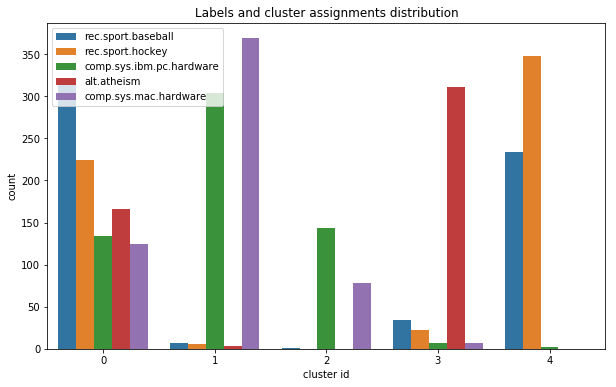

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.title("Labels and cluster assignments distribution")
_ = plt.xlabel('cluster id')

As expected, the majority of datapoints from two highly correlated classes ended up in one cluster (4) with a small dominance of "mac hardware" articles. "Atheism" class was separated well (cluster 3), although still some examples ended up in the cluster 0. Clusters 1 and 4 contain hardware-related data points, cluster 2 contains the sport-related ones from both sport classes with a slight dominance of "hockey". Cluster 0 contains a bit of a mix with the majority of datapoints belonging to sport topics. 

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [88]:
ad_rand_scores = []
n_components = [1,2,3,5,10,20,50,100,500,1000]

def report(model, d):
    print("Results after PCA of {} components: ".format(d))
    print("Inertia: {:.3f}".format(model.inertia_))
    score = adjusted_rand_score(y, model.labels_)
    print("Adjusted rand score: {:.3f}".format(score))
    ad_rand_scores.append(score)

for d in n_components:
    pca = PCA(n_components=d, random_state=1337)
    X_reduced = pca.fit_transform(X)
    kmeans = KMeans(n_clusters=5, random_state=1337).fit(X_reduced)
    report(kmeans, d)

Results after PCA of 1 components: 
Inertia: 2.821
Adjusted rand score: 0.210
Results after PCA of 2 components: 
Inertia: 10.579
Adjusted rand score: 0.267
Results after PCA of 3 components: 
Inertia: 20.412
Adjusted rand score: 0.240
Results after PCA of 5 components: 
Inertia: 49.933
Adjusted rand score: 0.225
Results after PCA of 10 components: 
Inertia: 117.714
Adjusted rand score: 0.202
Results after PCA of 20 components: 
Inertia: 230.404
Adjusted rand score: 0.209
Results after PCA of 50 components: 
Inertia: 488.632
Adjusted rand score: 0.185
Results after PCA of 100 components: 
Inertia: 799.920
Adjusted rand score: 0.215
Results after PCA of 500 components: 
Inertia: 2131.969
Adjusted rand score: 0.205
Results after PCA of 1000 components: 
Inertia: 2593.208
Adjusted rand score: 0.217


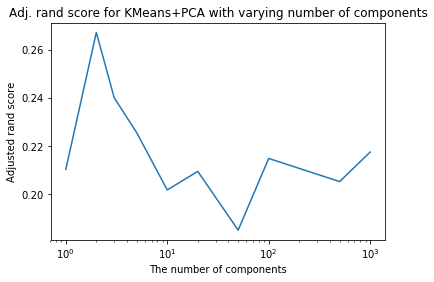

In [89]:
plt.plot(n_components, ad_rand_scores)
plt.xscale('log') 
plt.xlabel("The number of components")
plt.ylabel("Adjusted rand score")
_ = plt.title("Adj. rand score for KMeans+PCA with varying number of components")

The plot shows function of adjusted rand score with respect to the number of components based on 10 different (nr_of_components, a. d. score) points. There is a clear peak for 2 components, then the function decreases for the number of components smaller than 50 - afterwards it comes back to increasing slightly. 
Number of components indicate the number of dimensions in transformed dataset. We're not using inertia to compare different PCA models because it isn't a normalized metric (the more components, the bigger it got). The only value it can be compared with is 0. 
Euclidean distances tend to become inflated in a highly-dimensional space so K-Means didn't work too well on the original data. PCA seeks to represent all data points as linear combinations of a small number of eigenvectors (by minimizing the mean-squared reconstruction error) which results in reducing the noise and often helps to reveal clusters. Another issue: Euclidean distance gives an equal importance to each feature and we have highly correlated features, so their effect is duplicated in a way. Also linear dimensionality reduction might not be the best choice on these likely non-linear word importance features. 

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

Adjusted rand score: 0.267
Actual data:
The number of points in label rec.sport.baseball: 597
The number of points in label alt.atheism: 480
The number of points in label comp.sys.mac.hardware: 578
The number of points in label comp.sys.ibm.pc.hardware: 590
The number of points in label rec.sport.hockey: 600
Clustering results:
The number of points assigned to the label 0: 295
The number of points assigned to the label 1: 752
The number of points assigned to the label 2: 619
The number of points assigned to the label 3: 209
The number of points assigned to the label 4: 970


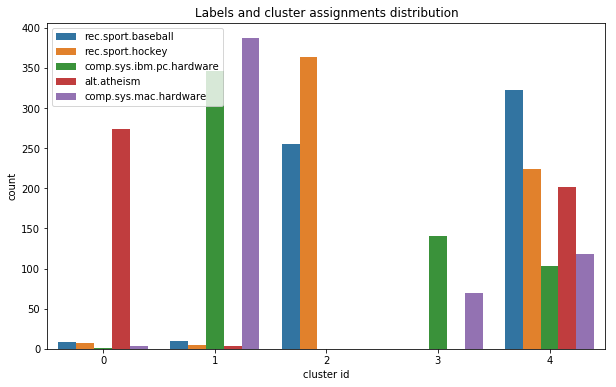

In [90]:
# 1
pca = PCA(n_components=2, random_state=1337)
X_2d = pca.fit_transform(X)

# 2
kmeans_pca = KMeans(n_clusters=5, random_state=1337).fit(X_2d)
score = adjusted_rand_score(y, kmeans_pca.labels_)
print("Adjusted rand score: {:.3f}".format(score))

# 3
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
plt.title("Labels and cluster assignments distribution")
_ = plt.xlabel('cluster id')

print("Actual data:")
for label, count in Counter(y).iteritems():    
    print("The number of points in label {}: {}".format(label, count))
    
print("Clustering results:")
for label, count in Counter(kmeans_pca.labels_).iteritems():    
    print("The number of points assigned to the label {}: {}".format(label, count))

The clustering is still rather bad because of the highly correlated pairs of topic (baseball and hockey, ibm hardware and mac hardware). K-Means fails when there are overlaps and clusters aren't spherical. As an experiment, I have checked below the results of K-Means with the number of clusters equal to 3. The dominant labels are "correct" - if we wanted to separate the data into three categories: sport, hardware and atheism/religion. But in the case of 5 labels (2 pairs of which are highly correlated) k-means fails even after PCA reduction.

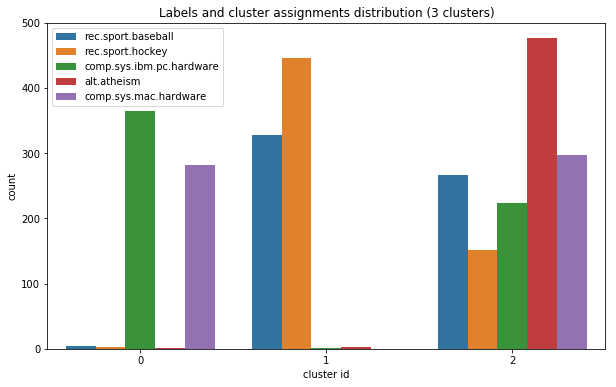

In [91]:
pca = PCA(n_components=2, random_state=1337)
X_2d = pca.fit_transform(X)
kmeans_3d = KMeans(n_clusters=3, random_state=1337).fit(X_2d)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans_3d.labels_, hue=y, ax=ax)
plt.title("Labels and cluster assignments distribution (3 clusters)")
_ = plt.xlabel('cluster id')

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [92]:
cats = ['alt.atheism','comp.sys.mac.hardware', 'rec.sport.hockey','comp.sys.ibm.pc.hardware', 'rec.sport.baseball']
y_num = kmeans_pca.labels_
labels_interp = np.array(cats)[y_num]
dictionary = dict(zip(y_num, labels_interp))
print("The mapping: {}".format(dictionary))
print("The labels for each point: {}".format(labels_interp))

The mapping: {0: 'alt.atheism', 1: 'comp.sys.mac.hardware', 2: 'rec.sport.hockey', 3: 'comp.sys.ibm.pc.hardware', 4: 'rec.sport.baseball'}
The labels for each point: ['rec.sport.baseball' 'rec.sport.hockey' 'rec.sport.hockey' ...,
 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey' 'rec.sport.baseball']


### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

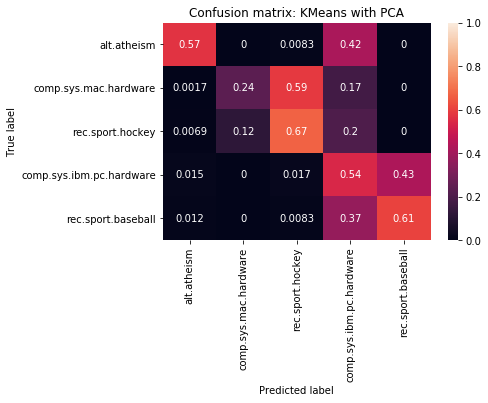

In [93]:
# First labs

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y, labels_interp)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, cats, title='Confusion matrix: KMeans with PCA')

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

([], <a list of 0 Text yticklabel objects>)

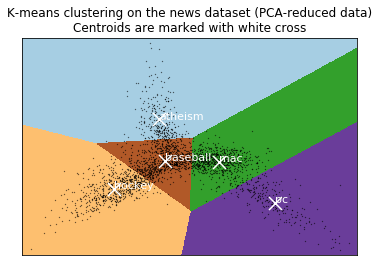

In [94]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001   # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 0.02, X_2d[:, 0].max() + 0.02 #arbitrary values to make the plot bigger
y_min, y_max = X_2d[:, 1].min() - 0.02, X_2d[:, 1].max() + 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

ax.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=0.5)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
centroids_labels = kmeans_pca.predict(centroids)


ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

for i, label in enumerate(centroids_labels):
    label = dictionary[label].split('.')
    if label[-1] == 'hardware':
        label = label[-2]
    else:
        label = label[-1]
    ax.annotate(label, (centroids[i,0], centroids[i,1]), color='w', fontsize=11)
    
plt.title('K-means clustering on the news dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Explained variance ratio of each component: [ 0.01428681  0.00902771]


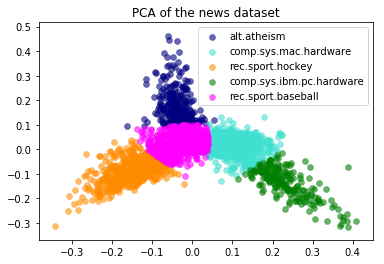

In [95]:
print('Explained variance ratio of each component: %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'green', 'magenta']

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], cats):
    plt.scatter(X_2d[y_num == i, 0], X_2d[y_num == i, 1], color=color, alpha=0.6, lw=0.5,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
_ = plt.title('PCA of the news dataset')

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

1. K-means is randomized in its starting centers: once the initial candidate centers are determined, it is deterministic after that point. The default initialization method kmeans++ is a biased random sampling (which prefers points that are far from each other).

2. It can be useful to restart the model several times to avoid falling in local minima (it is highly dependent on initialization).

3. Other methods supported by sklearn are: random and custom initial centers. K-means will always converge given enough time but random method might end up choosing centers close to each other and leading to slower convergence.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [96]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [97]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [98]:
data = pd.DataFrame(data=digits['data'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [99]:
print("Minimum and maximum value for each dimension can be seen above. The maximum value ranges from {} to {}.".format(data.max().min(), data.max().max()))

Minimum and maximum value for each dimension can be seen above. The maximum value ranges from 0.0 to 16.0.


In [100]:
data.min().sum()
print("Minimum value for each dimension: 0")

Minimum value for each dimension: 0


/Users/Aga/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


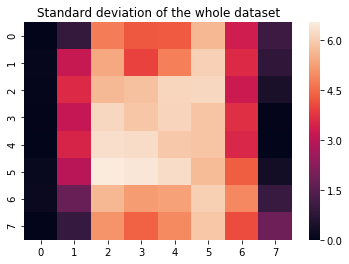

In [101]:
std = data.describe().loc['std']
std = std.reshape(8,8)
sns.heatmap(std)
_ = plt.title("Standard deviation of the whole dataset")

Dimension from 19 to 46 (the light square in the middle) seem to vary the most.

/Users/Aga/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


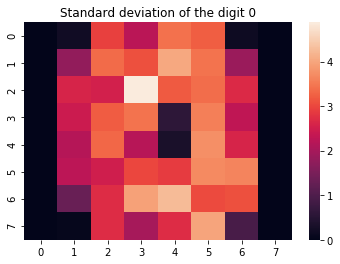

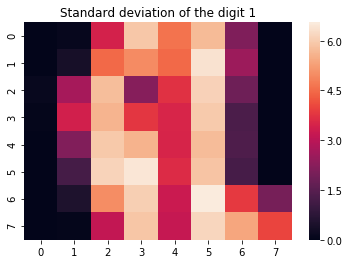

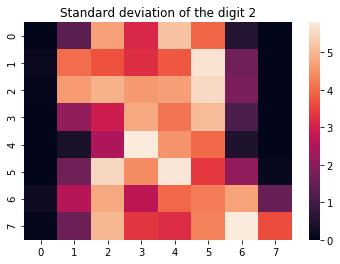

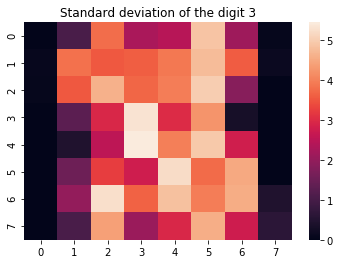

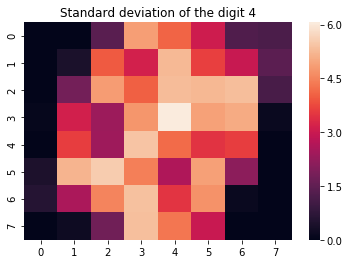

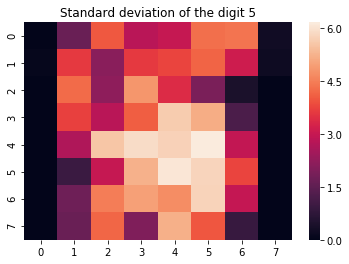

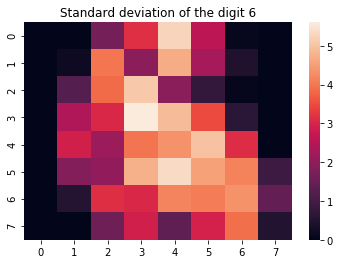

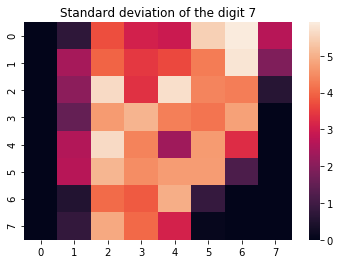

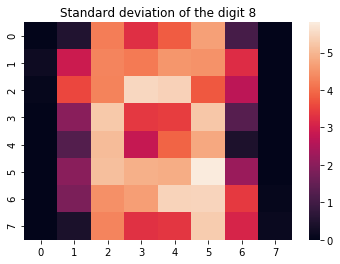

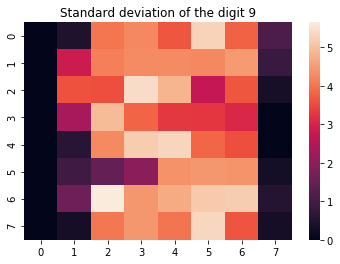

In [102]:
grouped = data.groupby(digits.target)
grouped_std = grouped.std()

for index, row in grouped_std.iterrows():
    row = row.reshape(8,8)
    plt.figure(index+1)
    sns.heatmap(row)
    _ = plt.title("Standard deviation of the digit {}".format(index))

/Users/Aga/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


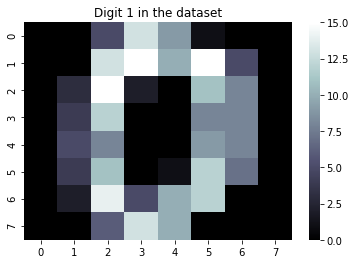

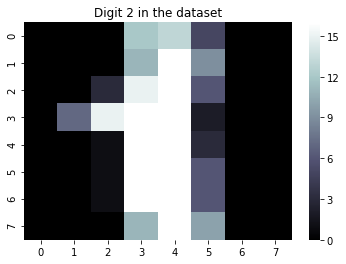

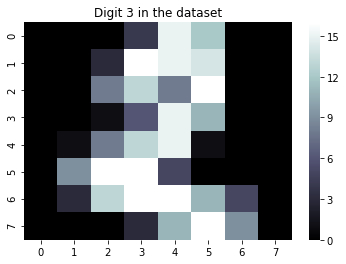

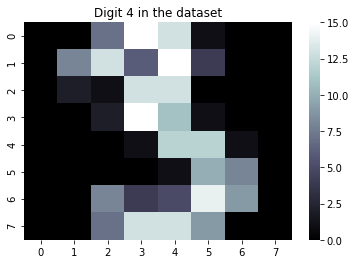

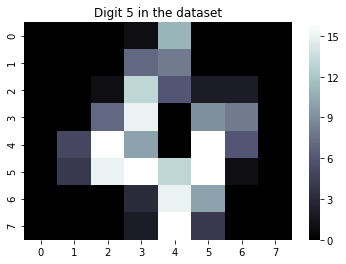

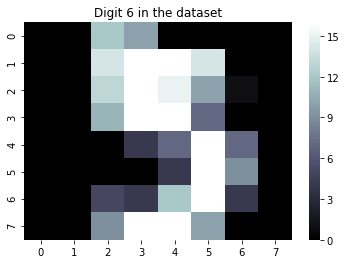

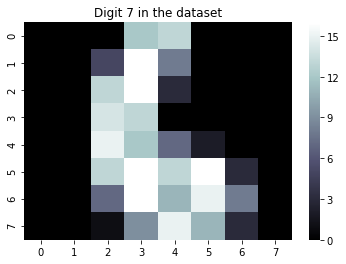

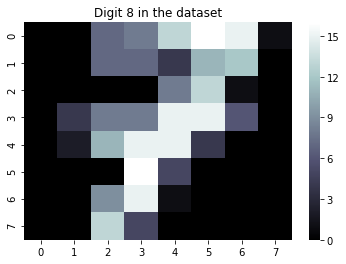

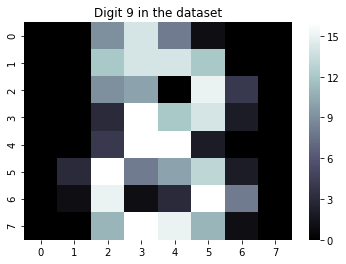

In [103]:
for index, row in data.iterrows():
    if index > 8:
        break
    plt.figure(index+1)
    row = row.reshape(8,8)
    sns.heatmap(row, cmap='bone')
    _ = plt.title("Digit {} in the dataset".format(index+1))


As we can see on the heatmaps, each digit is framed on the left and on the right side by empty space. These dimensions don't contain information useful in recognizing the class. 

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

In [104]:
n_components=digits.data.shape[1]
pca = PCA(n_components, random_state=1337)
X_trans = pca.fit_transform(digits.data)

# Scaling before PCA 
n_components=digits.data.shape[1]
pca_2 = PCA(n_components, random_state=1337)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)
X_scaled_trans = pca_2.fit_transform(X_scaled)

95% of the variance was explained at the 28 component.


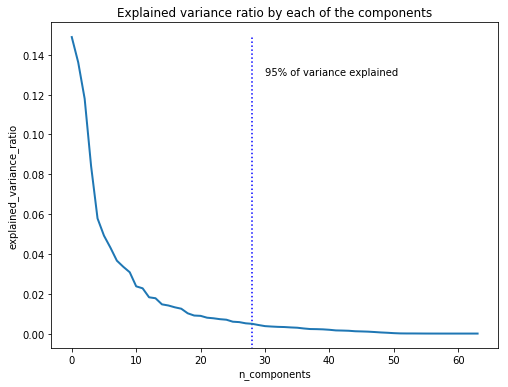

In [105]:
var = 0
for i in range(n_components):
    var = var + pca.explained_variance_ratio_[i]
    # print("Cumulative sum at the component {} is {}".format(i, var)) 
    if var > 0.95:
        print("95% of the variance was explained at the {} component.".format(i))
        break

plt.figure(1, figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.title("Explained variance ratio by each of the components")

plt.vlines(28, -0.01, 0.15, color='b',linestyles=':')
plt.annotate('95% of variance explained', 
             xy=(30, 0.13),  
             xycoords='data')

#print("Minimum explained variance ratio: {}".format(min(pca.explained_variance_ratio_)))
#print("Maximum explained variance ratio: {}".format(max(pca.explained_variance_ratio_)))

Around 30 of dimensions are enough to explain almost the whole variance. We don't need all of the 64 dimensions to represent the data - they introduce noise and duplicated information which lowers the performance most classifiers.

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

The shape of eigenvectors: (64, 64)


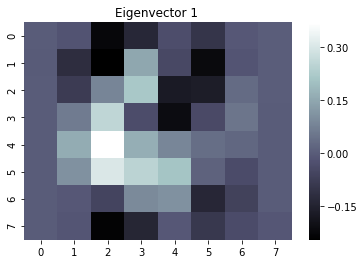

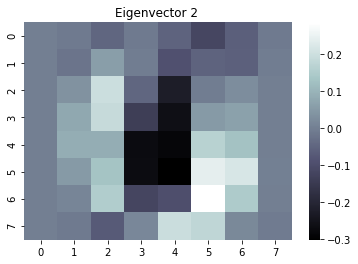

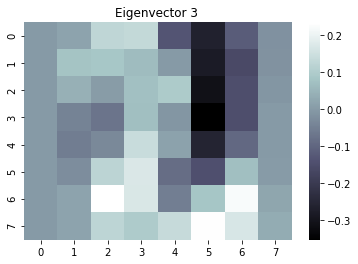

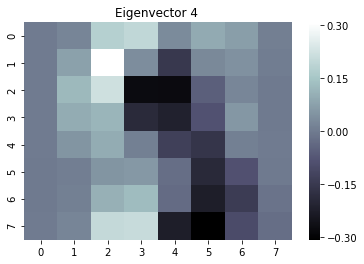

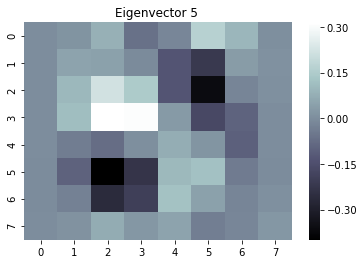

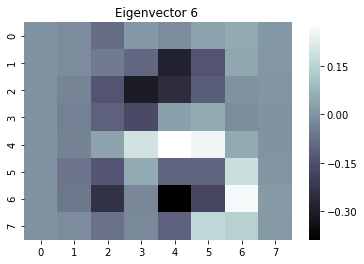

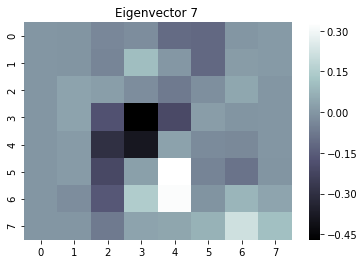

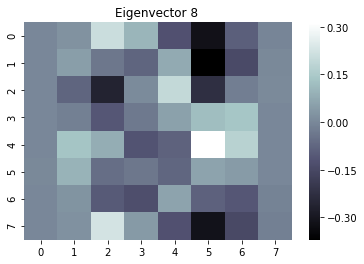

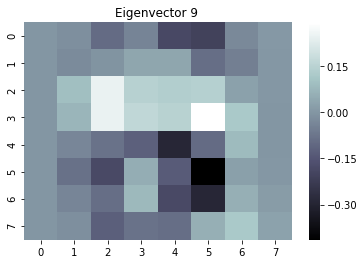

In [106]:
eigenvectors = pca.components_
print("The shape of eigenvectors: {}".format(eigenvectors.shape))

for i, vector in enumerate(eigenvectors):
    if i > 8:
        break
    plt.figure(i+1)
    vector = vector.reshape(8,8)
    sns.heatmap(vector, cmap='bone')
    _ = plt.title("Eigenvector {} ".format(i+1))

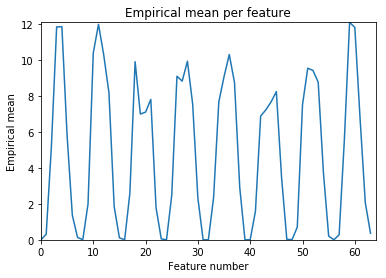

In [107]:
plt.plot(pca.mean_)
plt.axis([0, 64, np.min(pca.mean_), np.max(pca.mean_)])
plt.xlabel("Feature number")
plt.ylabel("Empirical mean")
_ = plt.title("Empirical mean per feature")

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

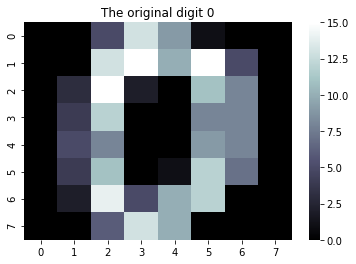

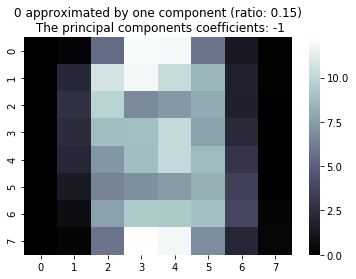

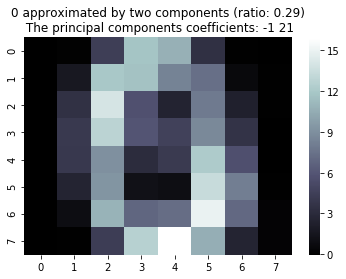

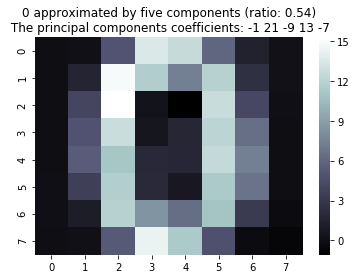

In [108]:
def cum_sum(n):
    var = 0
    for i in range(n):
        var = var + pca.explained_variance_ratio_[i]
    return var

coef = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
coefs_int = [int(round(i)) for i in coef]

plt.figure(1)
sns.heatmap(digits.data[0,:].reshape(8,8), cmap='bone')
_ = plt.title("The original digit 0")

plt.figure(2)
rec_1 = pca.mean_.reshape(8,8) + (coef[0] * eigenvectors[0]).reshape(8,8)
sns.heatmap(rec_1, cmap='bone')
_ = plt.title("0 approximated by one component (ratio: {0:.2f})".format(cum_sum(1)) + "\n The principal components coefficients: " + str(coefs_int[0]))

plt.figure(3)
rec_1 = pca.mean_.reshape(8,8) + (coef[0] * eigenvectors[0]).reshape(8,8) + (coef[1] * eigenvectors[1]).reshape(8,8)
sns.heatmap(rec_1, cmap='bone')
_ = plt.title("0 approximated by two components (ratio: {0:.2f})".format(cum_sum(2)) + "\n The principal components coefficients: " + str(coefs_int[0]) + " " + str(coefs_int[1]))

plt.figure(4)
rec_1 = pca.mean_.reshape(8,8) + (coef[0] * eigenvectors[0]).reshape(8,8) + (coef[1] * eigenvectors[1]).reshape(8,8) + (coef[2] * eigenvectors[2]).reshape(8,8) + (coef[3] * eigenvectors[3]).reshape(8,8) + (coef[4] * eigenvectors[4]).reshape(8,8)
sns.heatmap(rec_1, cmap='bone')
_ = plt.title("0 approximated by five components (ratio: {0:.2f})".format(cum_sum(5)) + "\n The principal components coefficients: " + str(coefs_int[0]) + " " + str(coefs_int[1]) + " " + str(coefs_int[2]) + " " + str(coefs_int[3]) + " " + str(coefs_int[4]))

The results look reasonable - the closest approximation of the real data is given by 5 components. One linear component isn't enough to clearly differentiate zero from the mean digit. 5 components are able to represent around 50% of the variance which at least in the case of such a distinct digit like zero is enough to recognize it.

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [109]:
# additionally compared with the effect of scaling

kf = KFold(n_splits = 5)
scores = np.zeros([6, 5])

# original digit data

for k, (train_index, test_index) in enumerate(kf.split(digits.data)):
    svc = SVC(kernel='linear', shrinking = False, random_state=0)
    svc.fit(digits.data[train_index], digits.target[train_index])
    scores[0][k] = svc.score(digits.data[test_index], digits.target[test_index])
    
    gnb = GaussianNB()
    gnb.fit(digits.data[train_index], digits.target[train_index])
    scores[3][k] = gnb.score(digits.data[test_index], digits.target[test_index])    

# data after PCA  - no scaling

for k, (train_index, test_index) in enumerate(kf.split(X_trans)):
    svc = SVC(kernel='linear', shrinking = False, random_state=0)
    svc.fit(X_trans[train_index], digits.target[train_index])
    scores[1][k] = svc.score(X_trans[test_index], digits.target[test_index])

    gnb = GaussianNB()
    gnb.fit(X_trans[train_index], digits.target[train_index])
    scores[4][k] = gnb.score(X_trans[test_index], digits.target[test_index])

# data after PCA - scaling

for k, (train_index, test_index) in enumerate(kf.split(X_scaled_trans)):
    svc = SVC(kernel='linear', shrinking = False, random_state=0)
    svc.fit(X_scaled_trans[train_index], digits.target[train_index])
    scores[2][k] = svc.score(X_scaled_trans[test_index], digits.target[test_index])

    gnb = GaussianNB()
    gnb.fit(X_scaled_trans[train_index], digits.target[train_index])
    scores[5][k] = gnb.score(X_scaled_trans[test_index], digits.target[test_index])

mean_scores = np.mean(scores, axis=1)

In [110]:
svm_scores = mean_scores[:3]
gnb_scores = mean_scores[3:]

print("SVM results: ")
print("    * original dataset: {0:.2f}".format(svm_scores[0]))
print("    * PCA: {0:.2f}".format(svm_scores[1]))
print("    * PCA+StandardScaler: {0:.2f}".format(svm_scores[2]))

print("Gaussian NB results: ")
print("    * original dataset: {0:.2f}".format(gnb_scores[0]))
print("    * PCA: {0:.2f}".format(gnb_scores[1]))
print("    * PCA+StandardScaler: {0:.2f}".format(gnb_scores[2]))

SVM results: 
    * original dataset: 0.95
    * PCA: 0.95
    * PCA+StandardScaler: 0.95
Gaussian NB results: 
    * original dataset: 0.81
    * PCA: 0.84
    * PCA+StandardScaler: 0.84


The score of Gaussian NB was improved by PCA (n_components=64) while SVM results remained the same. PCA rotates points to an orthogonal space where each dimension is independent. Dimensions in the transformed dataset are othogonal and independently contribute to the variance in the data, making Naive Bayes conditional independence assumption more realistic. 